In [1]:
import numpy as np
import scipy.special as scs
import matplotlib.pyplot as plt

### 1. Numerical errors

In [2]:
# 1
def sinc_function(x):
    return np.sinc(x/np.pi)

def sinc_series(x, N):
    Term = (-1)**N * x**(2*N) / scs.factorial(2*N+1)
    return np.sum(Term)

# In this case we can probably have 3 errors;
# The machine error, which is a fractional 10^-7 for the standard 32 bit
# The scond one might be a round-off error due to taking the sum
# The last one might be an overflow error, because of the factorial

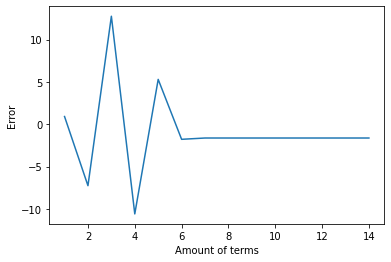

[  0.90614477  -7.2605219   12.74781144 -10.59524412   5.29100202
  -1.78559853  -1.63201219  -1.63172025  -1.63172455  -1.63172453
  -1.63172453  -1.63172453  -1.63172453  -1.63172453]


In [3]:
# 2
Terms = np.arange(1, 15, 1)
Values = []
for i in Terms:
    Values.append(sinc_series(7, np.arange(0,i,1)))

Value = sinc_function(7)

Error = Values-Value

plt.plot(Terms, Error)
plt.ylabel("Error")
plt.xlabel("Amount of terms")
plt.show()

print(Error)

# As we can see from the plot and the printed values we see that the error oscilates.

In [18]:
# 3

def sinc_function2(x):
    return np.sin(x, dtype="float32")/x

def sinc_series2(x, N):
    Term = (-1)**N * x**(2*N) / scs.factorial(2*N+1)
    return np.sum(Term, dtype='float32')


Value2 = np.float32(2)
sinc_2 = sinc_function2(Value2)

Terms = np.arange(1, 15, 1)
Values = []
for i in Terms:
    Range = np.arange(0,i,1)
    Values.append(sinc_series2(Value2, Range))

Error = Values-sinc_2

# plt.plot(Terms, Error)
# plt.ylabel("Error")
# plt.xlabel("Amount of terms")
# plt.show()

print(Error)

[ 5.45351267e-01 -1.21315390e-01  1.20179355e-02 -6.80476427e-04
  2.50041485e-05 -6.55651093e-07  0.00000000e+00 -2.98023224e-08
 -2.98023224e-08 -2.98023224e-08 -2.98023224e-08 -2.98023224e-08
 -2.98023224e-08 -2.98023224e-08]


In [19]:
Value2 = np.float64(2)
sinc_2 = sinc_function(Value2)

Terms = np.arange(1, 15, 1)
Values = []
for i in Terms:
    Range = np.arange(0,i,1)
    Range2 = Range.astype('float64')
    Values.append(sinc_series(Value2, Range2))

Error = Values-sinc_2

# plt.plot(Terms, Error)
# plt.ylabel("Error")
# plt.xlabel("Amount of terms")
# plt.show()

print(Error)

[ 5.45351287e-01 -1.21315380e-01  1.20179533e-02 -6.80459445e-04
  2.50079275e-05 -6.45431440e-07  1.23469960e-08 -1.82116988e-10
  2.13468132e-12 -2.03170814e-14  2.22044605e-16  5.55111512e-17
  5.55111512e-17  5.55111512e-17]


In [20]:
# From the 2 cells above we see that float32 saturates for 8 terms
# We also see that float64 saturates for 12 terms
# Minimal error is straightforward from the above cells.

### 2. A short timing test

In [32]:
# 1

G = 1.90809E5 # R*M* (km/s)^2
c = 1.998E5 # km/s
mean = 10**6 #M*
sigma = 10**5 #M*

Gauss = np.random.normal(10000, mean, sigma)

In [33]:
%%timeit

Rs = 2*G*Gauss/(c**2)

844 µs ± 105 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [34]:
c_inv = 1/c
c_inv2 = c_inv * c_inv

In [35]:
%%timeit

Rs = 2*G*Gauss * c_inv2

673 µs ± 89 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


### 3. Github Basics

In [ ]:
# Seems to be only working on git